케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트 (더 깊게 테스트) ReuterDeep1.ipynb 에서 ReuterDeep2.ipynb

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000, test_split=0.5)

len(train_data), len(test_data)

#train_data[5]

(5614, 5614)

In [2]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/20
22/22 [==============================] - 1s 30ms/step - loss: 3.6231 - accuracy: 0.2800 - val_loss: 3.3412 - val_accuracy: 0.4261
Epoch 2/20
22/22 [==============================] - 0s 14ms/step - loss: 2.9923 - accuracy: 0.5126 - val_loss: 2.6647 - val_accuracy: 0.5415
Epoch 3/20
22/22 [==============================] - 0s 13ms/step - loss: 2.2954 - accuracy: 0.5460 - val_loss: 2.0705 - val_accuracy: 0.5499
Epoch 4/20
22/22 [==============================] - 0s 14ms/step - loss: 1.8037 - accuracy: 0.5830 - val_loss: 1.7493 - val_accuracy: 0.5869
Epoch 5/20
22/22 [==============================] - 0s 14ms/step - loss: 1.5216 - accuracy: 0.6359 - val_loss: 1.5695 - val_accuracy: 0.6350
Epoch 6/20
22/22 [==============================] - 0s 14ms/step - loss: 1.3235 - accuracy: 0.6888 - val_loss: 1.4534 - val_accuracy: 0.6673
Epoch 7/20
22/22 [==============================] - 0s 13ms/step - loss: 1.1672 - accuracy: 0.7241 - val_loss: 1.3669 - val_accuracy: 0.6854
Epoch 8/20
22

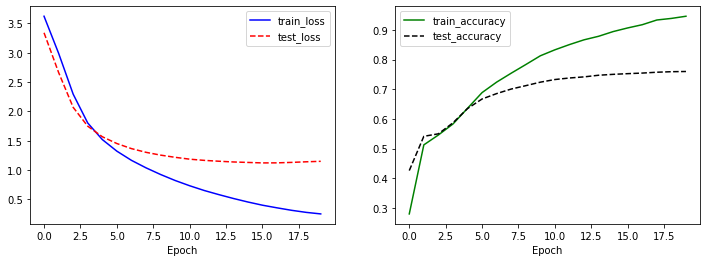

In [5]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

Epoch 1/20
22/22 [==============================] - 1s 26ms/step - loss: 3.5827 - accuracy: 0.3347 - val_loss: 3.2332 - val_accuracy: 0.3548
Epoch 2/20
22/22 [==============================] - 0s 13ms/step - loss: 2.8175 - accuracy: 0.3532 - val_loss: 2.4321 - val_accuracy: 0.3634
Epoch 3/20
22/22 [==============================] - 0s 14ms/step - loss: 2.1139 - accuracy: 0.4866 - val_loss: 1.9270 - val_accuracy: 0.5775
Epoch 4/20
22/22 [==============================] - 0s 13ms/step - loss: 1.6829 - accuracy: 0.6332 - val_loss: 1.6450 - val_accuracy: 0.6240
Epoch 5/20
22/22 [==============================] - 0s 13ms/step - loss: 1.4168 - accuracy: 0.6673 - val_loss: 1.4970 - val_accuracy: 0.6427
Epoch 6/20
22/22 [==============================] - 0s 13ms/step - loss: 1.2399 - accuracy: 0.7077 - val_loss: 1.4089 - val_accuracy: 0.6751
Epoch 7/20
22/22 [==============================] - 0s 15ms/step - loss: 1.1018 - accuracy: 0.7430 - val_loss: 1.3476 - val_accuracy: 0.6872
Epoch 8/20
22

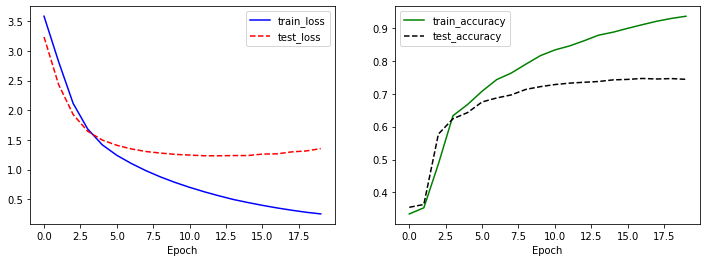

In [6]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

Epoch 1/20
22/22 [==============================] - 1s 26ms/step - loss: 3.7216 - accuracy: 0.0705 - val_loss: 3.5228 - val_accuracy: 0.1475
Epoch 2/20
22/22 [==============================] - 0s 14ms/step - loss: 3.1499 - accuracy: 0.4038 - val_loss: 2.7314 - val_accuracy: 0.5688
Epoch 3/20
22/22 [==============================] - 0s 15ms/step - loss: 2.3110 - accuracy: 0.5472 - val_loss: 2.0305 - val_accuracy: 0.5401
Epoch 4/20
22/22 [==============================] - 0s 15ms/step - loss: 1.7718 - accuracy: 0.5654 - val_loss: 1.7260 - val_accuracy: 0.5777
Epoch 5/20
22/22 [==============================] - 0s 15ms/step - loss: 1.5202 - accuracy: 0.6142 - val_loss: 1.5862 - val_accuracy: 0.6094
Epoch 6/20
22/22 [==============================] - 0s 13ms/step - loss: 1.3497 - accuracy: 0.6564 - val_loss: 1.5090 - val_accuracy: 0.6275
Epoch 7/20
22/22 [==============================] - 0s 13ms/step - loss: 1.2107 - accuracy: 0.6810 - val_loss: 1.4538 - val_accuracy: 0.6402
Epoch 8/20
22

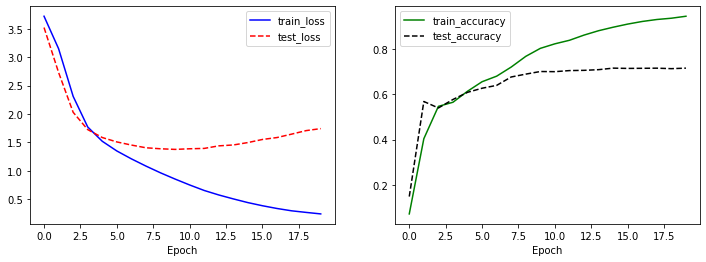

In [7]:
# 은닉층 3개

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()